# Pairs Trading

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels
# import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="whitegrid")
import yfinance as yf
import statsmodels.formula.api as sm

In [2]:
# Tickers_nifty = pd.read_csv("C:/Users/Sameer Kataria/Desktop/New folder/nifty50_tickers.csv")
# ticker_list = Tickers_nifty['Ticker'].to_list()
# ticker_list = [s + '.NS' for s in ticker_list]

In [3]:
Tickers_nyse = pd.read_csv("tickers_nyse.csv")
# ticker_list = Tickers_nifty['Ticker'].to_list()
# ticker_list = [s + '.NS' for s in ticker_list]

In [4]:
Tickers_nyse["Sector"].unique()

array(['Industrials', 'Health Care', 'Information Technology',
       'Communication Services', 'Consumer Staples',
       'Consumer Discretionary', 'Utilities', 'Financials', 'Materials',
       'Real Estate', 'Energy'], dtype=object)

In [5]:
health_data=Tickers_nyse[Tickers_nyse["Sector"]=="Energy"]

In [6]:
ticker_list=health_data.Symbol.values

In [7]:
df = yf.download(" ".join(ticker_list), start = "2022-02-05", end = "2022-04-01", interval="5m")["Adj Close"]

[*********************100%***********************]  21 of 21 completed


In [8]:
# df=df.dropna(how="all", axis=1)

# df=df[:-1]

# df.isna().sum()

In [9]:
# df=df[:-1]

In [10]:
df.isna().sum()

APA     0
BKR     0
COP     0
CTRA    0
CVX     0
DVN     0
EOG     0
FANG    0
HAL     0
HES     0
KMI     0
MPC     0
MRO     0
OKE     0
OXY     2
PSX     0
PXD     0
SLB     0
VLO     0
WMB     0
XOM     0
dtype: int64

In [11]:
data=df.dropna()

In [12]:
data=pd.DataFrame(data=data.values, columns=ticker_list)

In [13]:
# data=pd.DataFrame(data=data.values, columns=Tickers_nifty["Ticker"].values)

In [14]:
n = data.shape[1]
score_matrix = np.zeros((n, n))
pvalue_matrix = np.ones((n, n))
stock = data.columns

In [15]:
data

,APA,BKR,CVX,COP,CTRA,DVN,FANG,EOG,XOM,HAL,...,KMI,MRO,MPC,OXY,OKE,PSX,PXD,SLB,VLO,WMB
0,33.570000,26.660000,90.330002,23.040001,135.080002,52.000000,112.010002,129.610001,31.459999,94.089996,...,78.010002,21.169701,62.505001,40.009998,88.245003,224.559998,38.099998,86.144501,30.469999,80.885002
1,33.506401,26.889999,90.099998,22.840000,135.210098,51.893200,112.320000,130.039993,31.580000,94.099998,...,78.160004,21.133101,62.889999,40.015999,88.843300,224.800003,38.345001,86.839996,30.440001,81.150002
2,33.279999,26.850000,89.889999,22.850000,135.259995,51.750000,112.459999,129.617294,31.530001,93.845001,...,78.300003,21.117001,62.910000,39.790001,88.690002,224.199997,38.334999,86.964996,30.532499,81.179100
3,33.540001,26.950001,90.599998,23.070000,136.027496,52.450001,113.300003,130.785004,31.820000,94.650002,...,78.690002,21.290001,62.959999,40.285000,89.190002,225.419998,38.650002,87.389999,30.629999,81.690002
4,33.730000,27.055000,90.430000,23.209999,136.369995,52.619999,113.559998,131.326599,31.860001,94.745003,...,78.718697,21.330000,63.169998,40.404999,89.300003,225.595001,38.785000,87.540001,30.639999,81.555000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2958,41.540001,36.419998,100.684998,27.020000,163.139999,59.544998,119.919998,137.820007,38.014999,107.809998,...,85.890999,25.240000,70.980003,56.959999,86.705002,252.050003,41.485001,102.514999,33.555000,82.919899
2959,41.465000,36.180000,100.379997,27.020000,162.789993,59.285000,119.349998,137.500000,37.790001,107.510002,...,85.680000,25.138500,70.855003,56.810001,86.519997,251.360001,41.275501,101.970001,33.465000,82.555000
2960,41.419998,36.334999,100.480003,27.055000,163.169998,59.349998,119.610001,137.449997,37.970001,107.440002,...,85.839996,25.184999,70.809998,56.889999,86.690002,251.289993,41.465000,102.290001,33.505001,82.900002
2961,41.320000,36.419998,100.010002,26.980000,162.809998,59.119999,119.230003,137.100006,37.875000,107.040001,...,85.489998,25.110001,70.629997,56.740002,86.389999,249.860001,41.299999,101.540001,33.410000,82.620003


### Checking for relevant pairs

In [16]:
pairs = []
for i in range(n):
    for j in range(i+1, n):
        
        S1 = data[stock[i]]
        S2 = data[stock[j]]
        result = coint(S1, S2)
        score = result[0]
        pvalue = result[1]
        score_matrix[i, j] = score
        pvalue_matrix[i, j] = pvalue
        if pvalue < 0.05:
            pairs.append((stock[i], stock[j]))

In [17]:
# plt.figure(figsize=(10,8))
# sns.heatmap(score_matrix)

In [18]:
pd.DataFrame(pairs)

,0,1
0,APA,FANG
1,CVX,FANG
2,COP,FANG
3,COP,MPC
4,COP,VLO
5,FANG,XOM
6,FANG,HES
7,FANG,MRO
8,FANG,MPC
9,FANG,OXY


In [17]:
## a denotes score
## b is p values
## c is confidence interval
a,b,c=coint(data[pairs[5][0]], data[pairs[5][1]])

In [18]:
b

0.04046580818594377

Testing for Coint

In [31]:
data=pd.read_csv("data.csv", parse_dates=["Date"])

In [32]:
data.head()

,Date,FANG,XOM
0,2022-04-04 15:55:00,139.59,83.1700
1,2022-04-04 15:50:00,139.62,83.2300
2,2022-04-04 15:45:00,139.76,83.2200
3,2022-04-04 15:40:00,139.72,83.1400
4,2022-04-04 15:35:00,139.76,83.1345


In [36]:
data=data.sort_values("Date").reset_index(drop=True)

In [37]:
data=data.ffill()

In [41]:
data

,Date,FANG,XOM
0,2021-08-12 09:30:00,79.59,57.7000
1,2021-08-12 09:35:00,79.22,57.5300
2,2021-08-12 09:40:00,79.20,57.4500
3,2021-08-12 09:45:00,78.99,57.3100
4,2021-08-12 09:50:00,78.53,57.1599
...,...,...,...
12681,2022-04-04 15:35:00,139.76,83.1345
12682,2022-04-04 15:40:00,139.72,83.1400
12683,2022-04-04 15:45:00,139.76,83.2200
12684,2022-04-04 15:50:00,139.62,83.2300


In [43]:
data1=data[:1800]

In [44]:
a,b,c=coint(data1["FANG"],data1["XOM"])

In [45]:
b

0.9204105602268067

In [21]:
# ##KOTAK AND HDFC SAMPLE CODE
# model=sm.ols(formula= "{} ~ {}".format(pairs[5][1],pairs[5][0]), data=data).fit()

# model.summary()

# model.params

# TS=data[pairs[5][1]]-model.params[pairs[5][0]]*data[pairs[5][0]]

In [40]:
model=sm.ols(formula= "{} ~ {}".format("FANG","XOM"), data=data).fit()

model.summary()

model.params

TS=data["FANG"]-model.params["XOM"]*data["XOM"]

In [22]:
# model=sm.ols(formula= "{} ~ {}".format(pairs[12][0],pairs[12][1]), data=data).fit()

# model.summary()

# model.params

# TS=data[pairs[12][0]]-model.params[pairs[12][1]]*data[pairs[12][1]]

### Stationarity test for Generated Time Series

In [23]:
X = TS.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.437005
p-value: 0.009760
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [24]:
TS[:5]

0    48.853711
1    48.786287
2    48.337748
3    49.440858
4    49.711135
dtype: float64

In [25]:
TS_test=TS[2000:].reset_index(drop=True)
TS=TS[:2000]

In [26]:
meanp=TS.mean()
sdp=TS.std()

### Computing hit rate for a given Standard Deviation

In [27]:
dict_hits={}

In [28]:
for n in np.linspace(1,2,21):
    count=0
    for i in range(len(TS)-1):
        if (TS[i]<meanp-n*sdp) and (TS[i+1]>meanp-n*sdp):
            count+=1
        if (TS[i]>meanp-n*sdp) and (TS[i+1]<meanp-n*sdp):
            count+=1
        if (TS[i]<meanp+n*sdp) and (TS[i+1]>meanp+n*sdp):
            count+=1
        if (TS[i]>meanp+n*sdp) and (TS[i+1]<meanp+n*sdp):
            count+=1
        dict_hits[round(n,2)]=count
        
        

In [29]:
optim_hits=pd.DataFrame(dict_hits.values(),index=dict_hits.keys(), columns=["Hits"])
optim_hits.head()

,Hits
1.00,101
1.05,95
1.10,71
1.15,59
1.20,63


In [30]:
optim_hits.sort_values(["Hits"], ascending=False)

,Hits
1.00,101
1.05,95
1.10,71
1.20,63
1.25,61
1.15,59
1.40,59
1.30,51
1.35,51
1.65,49


In [31]:
optim_hits["Hits_filter"]=np.where(optim_hits.Hits>optim_hits.Hits.mean()+optim_hits.Hits.std(),1,0)

### Highest hit rate selection for a particular standard deviation

In [32]:
type_dev=optim_hits[optim_hits["Hits_filter"]==1].index.values
type_dev

array([1.  , 1.05, 1.1 ])

### Computing performance metrics for the given set of Standard Deviation

In [33]:
metrics_dict=[]
for n_dev in type_dev:


    sl=(meanp-(meanp-n_dev*sdp))/((meanp-n_dev*sdp)*2)

    posv=[]
    arrb=[]
    arrs=[]

    pos=0
    for i in range(len(TS)):
        if (TS[i]<=meanp-sdp*n_dev) & (TS[i]>=(meanp-sdp*n_dev)*(1-sl/3)):
            if pos==0:
                pos=1
                posv.append(pos)
                arrb.append(TS[i])

        if (TS[i]>=meanp+sdp*n_dev) & (TS[i]<=(meanp+sdp*n_dev)*(1+sl/3)):
            if pos==0:
                pos=-1
                posv.append(pos)
                arrb.append(TS[i])

        if TS[i]>=meanp:
            if pos==1:
                pos=0
                arrs.append(TS[i])
        if TS[i]<=meanp:
            if pos==-1:
                pos=0
                arrs.append(TS[i])

        if TS[i]<=(meanp-sdp*n_dev)*(1-sl):
            if pos==1:
                pos=0
                arrs.append(TS[i])

        if TS[i]>=(meanp+sdp*n_dev)*(1+sl):
            if pos==-1:
                pos=0
                arrs.append(TS[i])

    return_arr=[]

    for i in range(len(arrs)):
        if posv[i]==1:
            return_arr.append((arrs[i]-arrb[i])/arrb[i])
        if posv[i]==-1:
            return_arr.append((arrb[i]-arrs[i])/arrb[i])
    return_arr=np.array(return_arr)
    sharpe_ratio=return_arr.mean()/return_arr.std()
    ov_ret=(1+return_arr).cumprod()[-1]
    metrics_dict.append([n_dev,sharpe_ratio,ov_ret])

In [34]:
pd.DataFrame(metrics_dict, columns=["Dev", "Sharpe", "Overall_Ret"])

,Dev,Sharpe,Overall_Ret
0,1.00,0.369547,1.391772
1,1.05,0.272164,1.303166
2,1.10,0.288690,1.296061


### Selecting the appropriate standard deviation

In [35]:
n_dev=1.1

In [36]:
sl=(meanp-(meanp-n_dev*sdp))/((meanp-n_dev*sdp)*2)

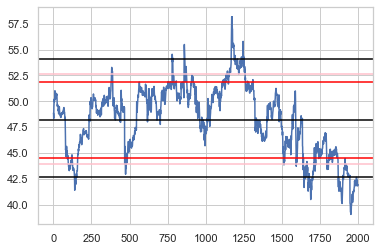

In [37]:
plt.plot(TS)
plt.axhline(TS.mean(), color='black')
plt.axhline(TS.mean()+n_dev*TS.std(), color='red')
plt.axhline(TS.mean()-n_dev*TS.std(), color='red')
plt.axhline((TS.mean()+n_dev*TS.std())*(1+sl/3), color='pink')
plt.axhline((TS.mean()-n_dev*TS.std())*(1-sl/3), color='pink')
plt.axhline((TS.mean()+n_dev*TS.std())*(1+sl), color='black')
plt.axhline((TS.mean()-n_dev*TS.std())*(1-sl), color='black')

### In sample Testing and Trade Log

In [38]:
posv=[]
arrb=[]
arrs=[]

pos=0
for i in range(len(TS)):
    if (TS[i]<=meanp-sdp*n_dev) & (TS[i]>=(meanp-sdp*n_dev)*(1-sl/3)):
        if pos==0:
            pos=1
            posv.append(pos)
            arrb.append(TS[i])

    if (TS[i]>=meanp+sdp*n_dev) & (TS[i]<=(meanp+sdp*n_dev)*(1+sl/3)):
        if pos==0:
            pos=-1
            posv.append(pos)
            arrb.append(TS[i])

    if TS[i]>=meanp:
        if pos==1:
            pos=0
            arrs.append(TS[i])
    if TS[i]<=meanp:
        if pos==-1:
            pos=0
            arrs.append(TS[i])
            
    if TS[i]<=(meanp-sdp*n_dev)*(1-sl):
        if pos==1:
            pos=0
            arrs.append(TS[i])
    
    if TS[i]>=(meanp+sdp*n_dev)*(1+sl):
        if pos==-1:
            pos=0
            arrs.append(TS[i])

In [39]:
return_arr=[]

for i in range(len(arrs)):
    if posv[i]==1:
        return_arr.append((arrs[i]-arrb[i])/arrb[i])
    if posv[i]==-1:
        return_arr.append((arrb[i]-arrs[i])/arrb[i])
        

In [40]:
(1+np.array(return_arr)).cumprod()

array([0.9523876 , 1.04632495, 1.12263378, 1.24597926, 1.18261104,
       1.11998333, 1.21217021, 1.14747019, 1.25759621, 1.37745902,
       1.49979154, 1.44380013, 1.40115584, 1.34713394, 1.2960611 ])

In [41]:
if len(arrb)==len(arrs):
    print(pd.DataFrame(data={"pos":posv, "buy/sell":arrb, "close":arrs, "profit/loss":return_arr}))
else:
    print(pd.DataFrame(data={"pos":posv[:-1], "buy/sell":arrb[:-1], "close":arrs, "profit/loss":return_arr} ))
        
    

    pos   buy/sell      close  profit/loss
0     1  44.427972  42.312650    -0.047612
1     1  43.935698  48.269231     0.098634
2    -1  51.982617  48.191507     0.072930
3     1  43.946090  48.774513     0.109872
4    -1  51.914565  54.554845    -0.050858
5    -1  52.549536  55.332409    -0.052957
6    -1  52.406757  48.093108     0.082311
7    -1  51.972493  54.746543    -0.053375
8    -1  52.523849  47.482984     0.095973
9     1  44.345070  48.571645     0.095311
10    1  44.402539  48.345941     0.088810
11    1  44.078020  42.432464    -0.037333
12    1  43.962625  42.664138    -0.029536
13    1  44.059585  42.360858    -0.038555
14    1  44.383614  42.700933    -0.037912


In [42]:
# pd.DataFrame(data={"pos":posv, "buy/sell":arrb, "close":arrs, "profit/loss":return_arr} )

### O/S Testing and Trade Log

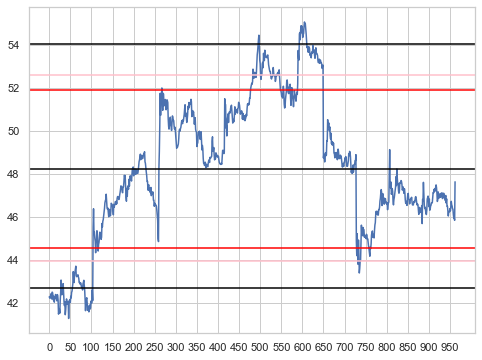

In [43]:
plt.figure(figsize=(8,6))
plt.plot(TS_test)
plt.axhline(TS.mean(), color='black')
plt.axhline(TS.mean()+n_dev*TS.std(), color='red')
plt.axhline(TS.mean()-n_dev*TS.std(), color='red')
plt.axhline((TS.mean()+n_dev*TS.std())*(1+sl/3), color='pink')
plt.axhline((TS.mean()-n_dev*TS.std())*(1-sl/3), color='pink')
plt.axhline((TS.mean()+n_dev*TS.std())*(1+sl), color='black')
plt.axhline((TS.mean()-n_dev*TS.std())*(1-sl), color='black')
plt.xticks(np.arange(min(range(len(TS_test))), max(range(len(TS_test)))+1, 50))
plt.show()

In [44]:
posvt=[]
arrbt=[]
arrst=[]

pos=0

In [45]:
for i in range(len(TS_test)):
    if (TS_test[i]<=meanp-sdp*n_dev) & (TS_test[i]>=(meanp-sdp*n_dev)*(1-sl/2)):
        if pos==0:
            pos=1
            posvt.append(pos)
            arrbt.append(TS_test[i])

    if (TS_test[i]>=meanp+sdp*n_dev) & (TS_test[i]<=(meanp+sdp*n_dev)*(1+sl/2)):
        if pos==0:
            pos=-1
            posvt.append(pos)
            arrbt.append(TS_test[i])

    if TS_test[i]>=meanp:
        if pos==1:
            pos=0
            arrst.append(TS_test[i])
    if TS_test[i]<=meanp:
        if pos==-1:
            pos=0
            arrst.append(TS_test[i])
            
    if TS_test[i]<=(meanp-sdp*n_dev)*(1-sl):
        if pos==1:
            pos=0
            arrst.append(TS_test[i])
    
    if TS_test[i]>=(meanp+sdp*n_dev)*(1+sl):
        if pos==-1:
            pos=0
            arrst.append(TS_test[i])

In [46]:
return_arrt=[]

for i in range(len(arrst)):
    if posvt[i]==1:
        return_arrt.append((arrst[i]-arrbt[i])/arrbt[i])
    if posvt[i]==-1:
        return_arrt.append((arrbt[i]-arrst[i])/arrbt[i])
        

In [47]:
arrbt

[43.7112990509266,
 44.33794156437217,
 52.00499478875331,
 52.55982849648595,
 52.91612147215024,
 44.20315474787476]

In [48]:
# trade_log=pd.DataFrame(data={"pos":posvt[:-1], "buy/sell":arrbt[:-1], "close":arrst} )
# trade_log

In [49]:
trade_log=pd.DataFrame(data={"pos":posvt, "buy/sell":arrbt, "close":arrst} )
trade_log

,pos,buy/sell,close
0,1,43.711299,42.603784
1,1,44.337942,48.235061
2,-1,52.004995,54.260527
3,-1,52.559828,54.521138
4,-1,52.916121,48.070900
5,1,44.203155,49.134418


In [50]:
pl_arr=[]
for i in range(len(trade_log)):
    if trade_log.pos[i]==-1:
        pl_arr.append((trade_log["buy/sell"][i]-trade_log["close"][i])/trade_log["buy/sell"][i])
    if trade_log.pos[i]==1:
        pl_arr.append((-trade_log["buy/sell"][i]+trade_log["close"][i])/trade_log["buy/sell"][i])

In [51]:
trade_log["profit_loss"]=pl_arr
trade_log

,pos,buy/sell,close,profit_loss
0,1,43.711299,42.603784,-0.025337
1,1,44.337942,48.235061,0.087896
2,-1,52.004995,54.260527,-0.043371
3,-1,52.559828,54.521138,-0.037316
4,-1,52.916121,48.070900,0.091564
5,1,44.203155,49.134418,0.111559


In [52]:
(1+trade_log.profit_loss).cumprod()

0    0.974663
1    1.060332
2    1.014344
3    0.976493
4    1.065904
5    1.184816
Name: profit_loss, dtype: float64

In [53]:
print("The O/S sharpe ratio is {}".format(trade_log.profit_loss.mean()/trade_log.profit_loss.std()))

The O/S sharpe ratio is 0.4214007959555137
